In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report
import os
import glob
import helper_functions as h


Read in one of the model files to work out the visualization parameters.

In [2]:
logo_mnb = pd.read_csv('../data/logo_mnb.csv')

In [3]:
logo_mnb.head()

,text#,title,author,words,text_length,is_Austen,is_Austen_bool,token_text,token_num,token_char_count,token_sent_count,token_word_count,predictions,probabilities,correct_pred
0,52705351,The Meek Shall Inherit,AvonleaBrigadoon,67407,long,Not Austen,0,21 July 1809 I am sixteen today: an age at whi...,1,1994,29,381,0,3.917950e-32,1
1,52705351,The Meek Shall Inherit,AvonleaBrigadoon,67407,long,Not Austen,0,24 July I have conquered the first phrase with...,2,1989,23,378,0,5.510400e-36,1
2,52705351,The Meek Shall Inherit,AvonleaBrigadoon,67407,long,Not Austen,0,"Jane and Lizzy tried speaking to Papa, saying ...",3,1966,23,384,0,1.999711e-29,1
3,52705351,The Meek Shall Inherit,AvonleaBrigadoon,67407,long,Not Austen,0,"I was so embarrassed, that I was not able to a...",4,1929,23,347,0,2.665862e-38,1
4,52705351,The Meek Shall Inherit,AvonleaBrigadoon,67407,long,Not Austen,0,"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 28 December, 18...",5,1992,25,364,0,1.465096e-36,1


In [25]:
# function is in helperfunctions but I want to modify it here
def get_metrics(df, actual, pred):
    actual_val = df[actual]
    pred_val = df[pred]
    
    conf_matrix = confusion_matrix(actual_val, pred_val)
    acc_score = accuracy_score(actual_val, pred_val)
    class_report = classification_report(actual_val, pred_val, target_names = ['Not Austen', 'Austen'], output_dict = True)

    return conf_matrix, acc_score, class_report

In [26]:
cm, acc, cr = get_metrics(logo_mnb, 'is_Austen_bool', 'predictions')

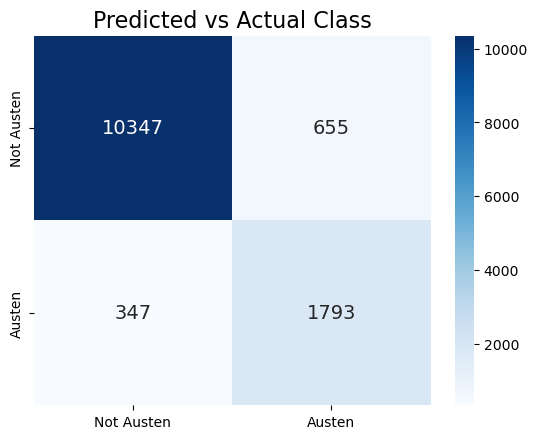

In [16]:
# confusion matrix heatmap
class_labels = ['Not Austen', 'Austen']
# plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = class_labels, yticklabels = class_labels, annot_kws = {'size': 14})
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
plt.title('Predicted vs Actual Class', fontsize = 16)
plt.savefig('../images/logo_mnb_c_cm.png', bbox_inches = 'tight', transparent = True);

In [55]:
def save_cm_heatmap(cm, img_name:str):
    # confusion matrix heatmap
    class_labels = ['Not Austen', 'Austen']
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = class_labels, yticklabels = class_labels, annot_kws = {'size': 14})
    plt.savefig(f'../images/{img_name}.png', bbox_inches = 'tight', transparent = True)
    plt.close()

In [56]:
save_cm_heatmap(cm, 'logo_mnb_c_cm')

In [27]:
print(cm)
print(acc)
print(cr)

[[10347   655]
 [  347  1793]]
0.9237558971237254
{'Not Austen': {'precision': 0.967551898260707, 'recall': 0.9404653699327395, 'f1-score': 0.953816371681416, 'support': 11002.0}, 'Austen': {'precision': 0.7324346405228758, 'recall': 0.8378504672897197, 'f1-score': 0.7816041848299913, 'support': 2140.0}, 'accuracy': 0.9237558971237254, 'macro avg': {'precision': 0.8499932693917913, 'recall': 0.8891579186112296, 'f1-score': 0.8677102782557036, 'support': 13142.0}, 'weighted avg': {'precision': 0.9292661783125287, 'recall': 0.9237558971237254, 'f1-score': 0.925773906313736, 'support': 13142.0}}


In [53]:
def save_class_report(cr, img_name:str):
    cr_df = pd.DataFrame(cr).transpose()
    cr_df = cr_df.round(2)

    fig, ax = plt.subplots()
    ax.axis('off')

    table = ax.table(cellText = cr_df.values, colLabels = cr_df.columns, rowLabels = cr_df.index, cellLoc = 'center', loc = 'center')

    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)

    plt.savefig(f'../images/{img_name}.png', bbox_inches = 'tight', transparent = True)
    plt.close()

In [54]:
save_class_report(cr, 'logo_mnb_c_cr')

In [49]:
def save_bar_chart(df, title:str, img_name:str):
    # new column to indicate correct prediction
    df['correct_pred'] = (df['is_Austen_bool'] == df['predictions']).astype(int)

    # group by text and normalize
    text_acc = df.groupby(['text#', 'title', 'author'])['correct_pred'].mean().reset_index()
    text_acc = text_acc.sort_values(by = 'correct_pred', ascending = False)

    # chart
    ja_list = ['Sense and Sensibility', 'Pride and Prejudice', 'Emma', 'Mansfield Park', 'Northanger Abbey', 'Persuasion']
    plt.figure(figsize = (10, 10))
    plt.title(title, fontsize = 16)
    plt.xlabel('Accuracy')
    plt.ylabel('Book Title')
    clrs = ['maroon' if x in ja_list else '#1f77b4' for x in text_acc['title']]
    sns.barplot(y = 'title', x = 'correct_pred', hue = 'title', data = text_acc, palette = clrs)

    plt.savefig(f'../images/{img_name}.png', bbox_inches = 'tight')
    plt.close()


In [50]:
save_bar_chart(logo_mnb, 'Prediction Accuracy by Book', 'logo_mnb_c_bar')

To produce charts for all models:
- get list of filenames (by naming convention)
- for loop over list of files, create df and use metrics and visualization functions
- variable with base name
- print base name and accuracy score

In [70]:
files = glob.glob('../data/logo*.csv')
filenames = {}

for file in files:
    filepath = file
    basename = filepath.split('/')[-1].split('.')[0]
    filenames.update({filepath : basename})

for file in filenames.keys():
    basename = filenames[file]
    df = pd.read_csv(file)

    # get metrics
    cm, acc, cr = get_metrics(df, 'is_Austen_bool', 'predictions')

    # create and save visuals
    save_cm_heatmap(cm, basename)
    save_class_report(cr, basename)
    save_bar_chart(logo_mnb, 'Prediction Accuracy by Book', basename)

    print(basename)
    print(f'Accuracy score: {acc}')

logo_df_xgb_c
Accuracy score: 0.9164510728960584
logo_df_xgb
Accuracy score: 0.9092984325064678
logo_xgb_c_pro
Accuracy score: 0.9044285496880231
logo_mnb
Accuracy score: 0.9237558971237254
logo_mnb_c_pro
Accuracy score: 0.9184294627910516
logo_xgb_tf_pro
Accuracy score: 0.890579820423071
logo_mnb_tf_pro
Accuracy score: 0.8354892710394156
logo_df_mnb_tf
Accuracy score: 0.8369350175011414


logo_df_xgb is XGB with tf-idf, no pre-processing (generated before I refined the naming convention to include all components)